In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rain Dataset 2.csv')

In [ ]:
df

,Year,Mean Temperature,Precipitation,Humidity,WindSpeed
0,1901,26.63,1344.89,93.828940,15.021105
1,1902,26.83,1150.76,94.197820,11.090103
2,1903,26.86,1222.17,94.832620,11.681987
3,1904,26.81,1155.25,96.472030,9.000000
4,1905,26.71,1262.99,97.118700,4.843305
...,...,...,...,...,...
116,2017,27.46,1158.26,78.567986,13.527572
117,2018,27.41,1232.61,80.274216,13.044723
118,2019,27.29,1296.43,80.512660,11.298495
119,2020,27.43,1254.62,81.257800,10.188700


Text(0.5, 0, 'parameters')

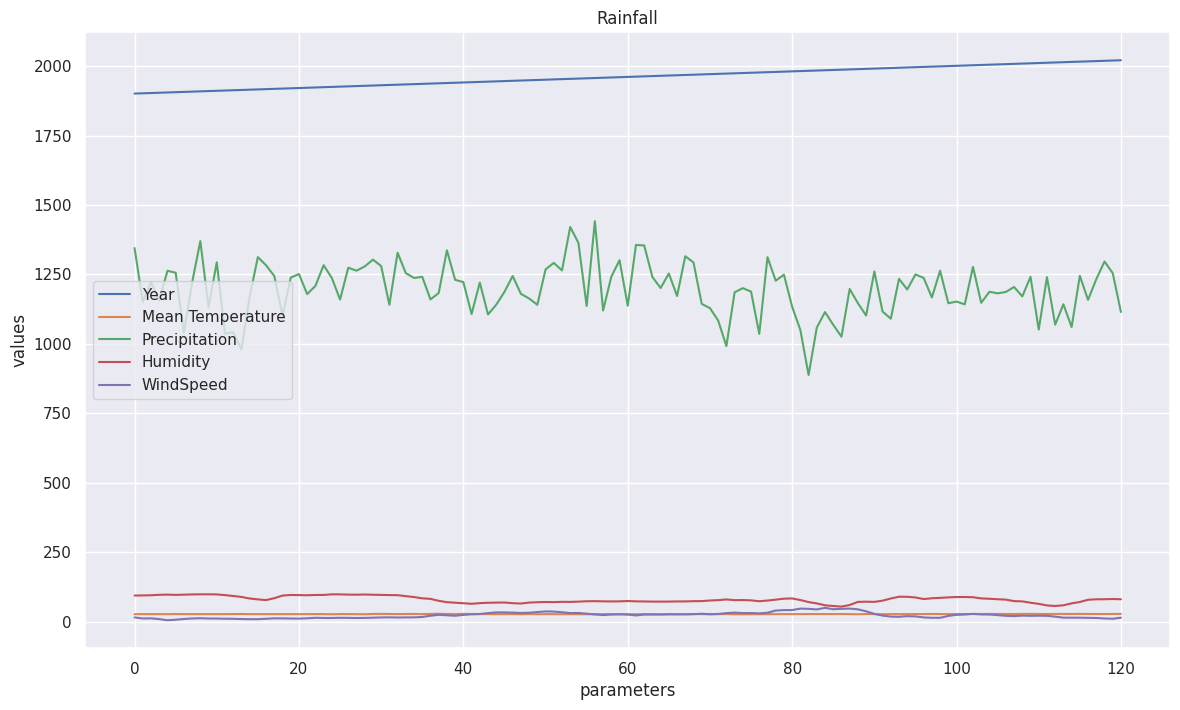

In [ ]:
df.plot(kind='line', figsize =(14,8))
plt.title('Rainfall')
plt.ylabel('values')
plt.xlabel('parameters')

In [ ]:
train_dates=pd.to_datetime(df['Year'])

In [ ]:
train_dates

0     1970-01-01 00:00:00.000001901
1     1970-01-01 00:00:00.000001902
2     1970-01-01 00:00:00.000001903
3     1970-01-01 00:00:00.000001904
4     1970-01-01 00:00:00.000001905
                   ...             
116   1970-01-01 00:00:00.000002017
117   1970-01-01 00:00:00.000002018
118   1970-01-01 00:00:00.000002019
119   1970-01-01 00:00:00.000002020
120   1970-01-01 00:00:00.000002021
Name: Year, Length: 121, dtype: datetime64[ns]

In [ ]:
cols=list(df)[2:3]
print(cols)

['Precipitation']


<Axes: >

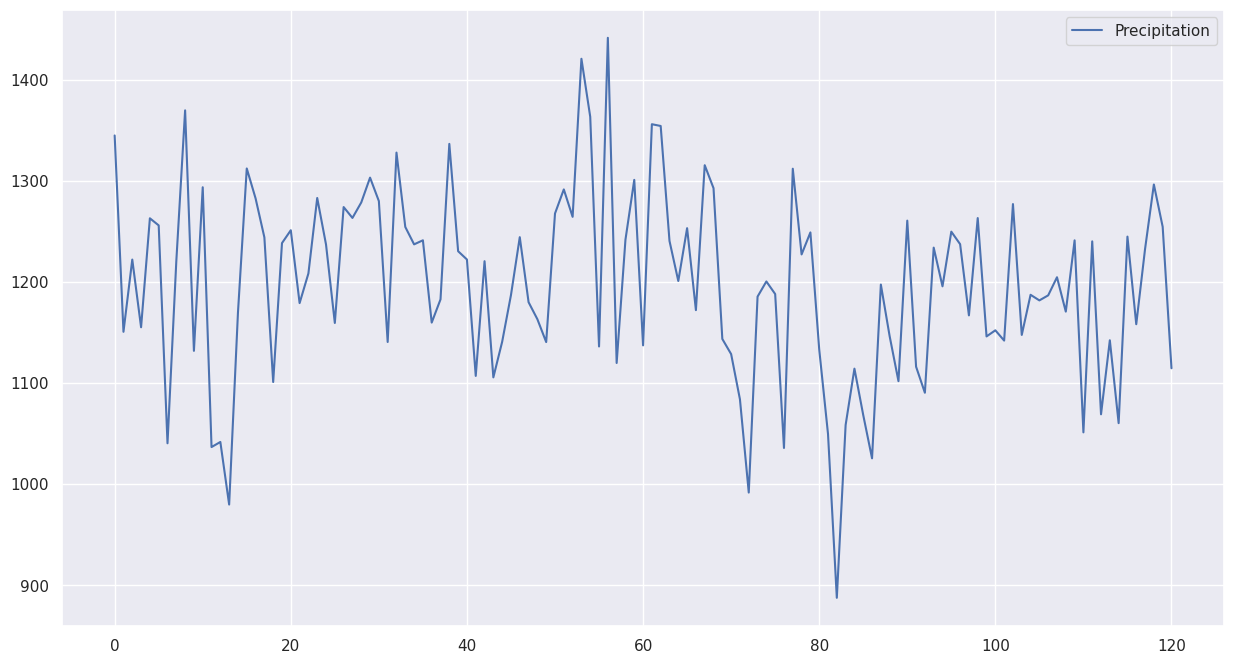

In [ ]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [ ]:
from tensorflow.python import train

# Lists for starting the training data considering multiple variables
# trainX for storing training data (mean_temperature, min_temperature, max_temperature)
# trainY for storing target values (rainfall)

trainX = []
trainY = []

n_past = 20  # 20 values will be considered to predict the next values
n_future = 100  # for predicting the next 100 values based on previous 20 values

# Adding the values to trainX and trainY lists
for i in range(n_past, len(training_df_scaled) - n_future + 1):
    trainX.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i + n_future - 1: i + n_future, 0])

# Converting into numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}'.format(trainX.shape))  # Knowing the shape
print('trainY shape == {}'.format(trainY.shape))


trainX shape == (2, 20, 1)
trainY shape == (2, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Lists for starting the training data considering multiple variables
# trainX for storing training data (mean_temperature, min_temperature, max_temperature)
# trainY for storing target values (rainfall)

trainX = []
trainY = []

n_past = 20  # 20 values will be considered to predict the next values
n_future = 100  # for predicting the next 100 values based on previous 20 values

# Adding the values to trainX and trainY lists
for i in range(n_past, len(training_df_scaled) - n_future + 1):
    trainX.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i + n_future - 1: i + n_future, 0])

# Converting into numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}'.format(trainX.shape))  # Knowing the shape
print('trainY shape == {}'.format(trainY.shape))

# Split the training data into training (80%) and validation (20%) sets
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

print('trainX shape == {}'.format(trainX.shape))  # Training data shape
print('trainY shape == {}'.format(trainY.shape))
print('valX shape == {}'.format(valX.shape))  # Validation data shape
print('valY shape == {}'.format(valY.shape))


trainX shape == (2, 20, 1)
trainY shape == (2, 1)
trainX shape == (1, 20, 1)
trainY shape == (1, 1)
valX shape == (1, 20, 1)
valY shape == (1, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# LSTM layer with dropout and L2 regularization
model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Adjust dropout rate

# LSTM layer with dropout
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Adjust dropout rate

# LSTM layer without return_sequences
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.3))  # Adjust dropout rate

# Output layer
model.add(Dense(trainY.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Replace valX and valY with your actual validation data
# Train the model with validation data
model.fit(trainX, trainY, validation_data=(valX, valY), callbacks=[early_stopping])

# Model summary
model.summary()


1/1 [==============================] - 15s 15s/step - loss: 0.3998 - val_loss: 0.8183
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 20, 32)            4352      
                                                                 
 dropout_18 (Dropout)        (None, 20, 32)            0         
                                                                 
 lstm_19 (LSTM)              (None, 20, 32)            8320      
                                                                 
 dropout_19 (Dropout)        (None, 20, 32)            0         
                                                                 
 lstm_20 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load your time series data here (trainX, trainY, valX, valY)

model = Sequential()

model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(8, activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=500, callbacks=[early_stopping, checkpoint])

best_model = load_model("best_model.h5")

best_model.summary()


Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.3779 - val_loss: 0.8480
Epoch 2/500
1/1 [==============================] - 0s 103ms/step - loss: 0.2198 - val_loss: 0.8510
Epoch 3/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 100ms/step - loss: 0.0814 - val_loss: 0.8570
Epoch 4/500
1/1 [==============================] - 0s 100ms/step - loss: 0.3743 - val_loss: 0.8623
Epoch 5/500
1/1 [==============================] - 0s 95ms/step - loss: 0.2566 - val_loss: 0.8673
Epoch 6/500
1/1 [==============================] - 0s 81ms/step - loss: 0.5581 - val_loss: 0.8709
Epoch 7/500
1/1 [==============================] - 0s 80ms/step - loss: 0.3707 - val_loss: 0.8743
Epoch 8/500
1/1 [==============================] - 0s 105ms/step - loss: 0.2665 - val_loss: 0.8775
Epoch 9/500
1/1 [==============================] - 0s 110ms/step - loss: 0.0591 - val_loss: 0.8806
Epoch 10/500
1/1 [==============================] - 0s 91ms/step - loss: 0.3272 - val_loss: 0.8834
Epoch 11/500
1/1 [==============================] - 0s 117ms/step - loss: 0.3660 - val_loss: 0.8863
Epoch 12/500
1/1 [==============================] - 0s 96ms/step - loss: 0.3015 - val_loss: 0.8891
Epoch 13/500
1/1 [======

In [ ]:
print('trainX shape == {}'.format(trainX.shape))
print('trainY shape == {}'.format(trainY.shape))


trainX shape == (1, 20, 1)
trainY shape == (1, 1)


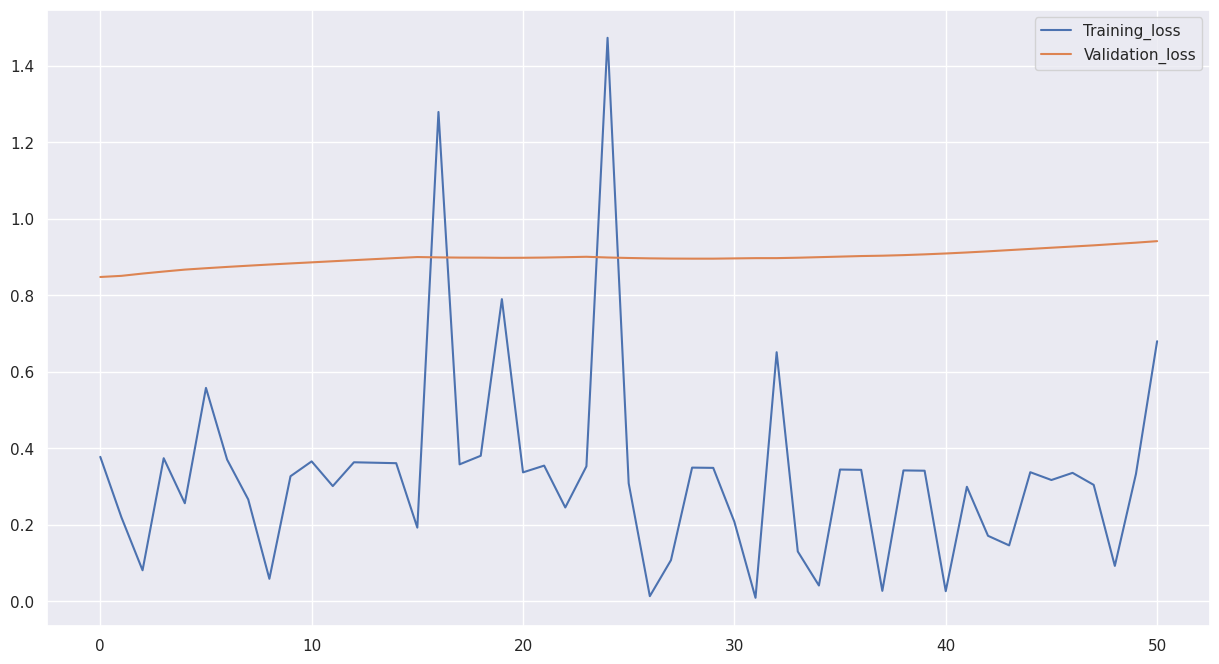

In [ ]:
plt.plot(history.history['loss'], label ='Training_loss')
plt.plot(history.history['val_loss'], label ='Validation_loss')
plt.legend()


In [ ]:
#Predicting
#Libraries
#Otherwise our dates would be wrong when we look back or forward
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import timedelta



import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar



n_past = 1
n_days_for_prediction = 100

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

#make_prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#perform inverse transformation to rescale back to original range
#since we used 1 variables to transform, the inverse expects same dimension
prediction_copies = np.repeat(prediction, training_df.shape[1], axis =-1)

y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

#Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
  forecast_dates.append(time_i.date())

df_forecast = pd.Dataframe({'Date': np.array(forecast_dates), 'precipitation': y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

NameError: ignored

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import timedelta

# Define the number of days for prediction
n_days_for_prediction = 10

# Load your time


# Define a list of holiday dates
holidays = USFederalHolidayCalendar().holidays()

# Function to generate custom business days
def custom_business_day(start_date, n):
    current_date = start_date
    while n > 0:
        current_date += timedelta(days=1)
        if current_date.weekday() >= 5 or current_date in holidays:
            continue
        yield current_date
        n -= 1

# Example usage to generate business days
start_date = pd.to_datetime(list(train_dates)[-n_past])
predict_period_dates = list(custom_business_day(start_date, n_days_for_prediction))


<ipython-input-104-4200a210b17c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Year'] = pd.to_datetime(original['Year'])


<Axes: xlabel='Year', ylabel='Precipitation'>

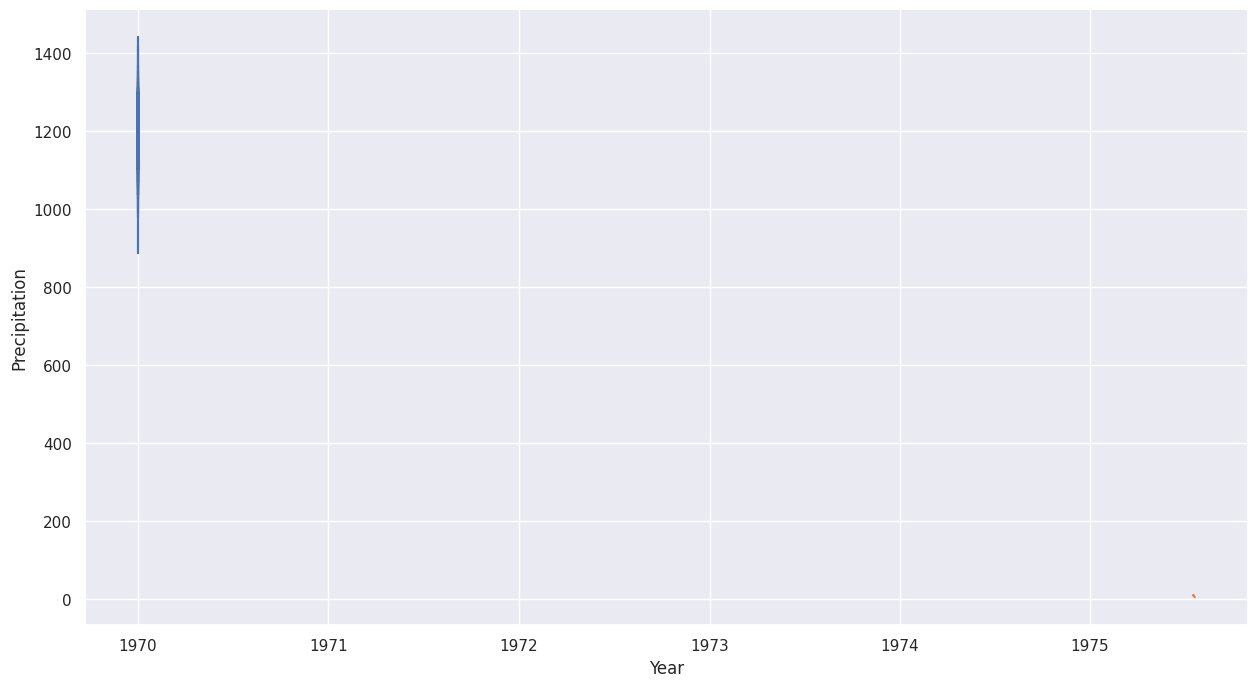

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming df_forecast is a DataFrame with 'Year' and 'Precipitation' columns

original = df[['Year', 'Precipitation']]
original['Year'] = pd.to_datetime(original['Year'])
original = original.loc[original['Year'] >= '1970-01-01']

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(data=original, x='Year', y='Precipitation')
sns.lineplot(data=df_forecast, x='Year', y='Precipitation')


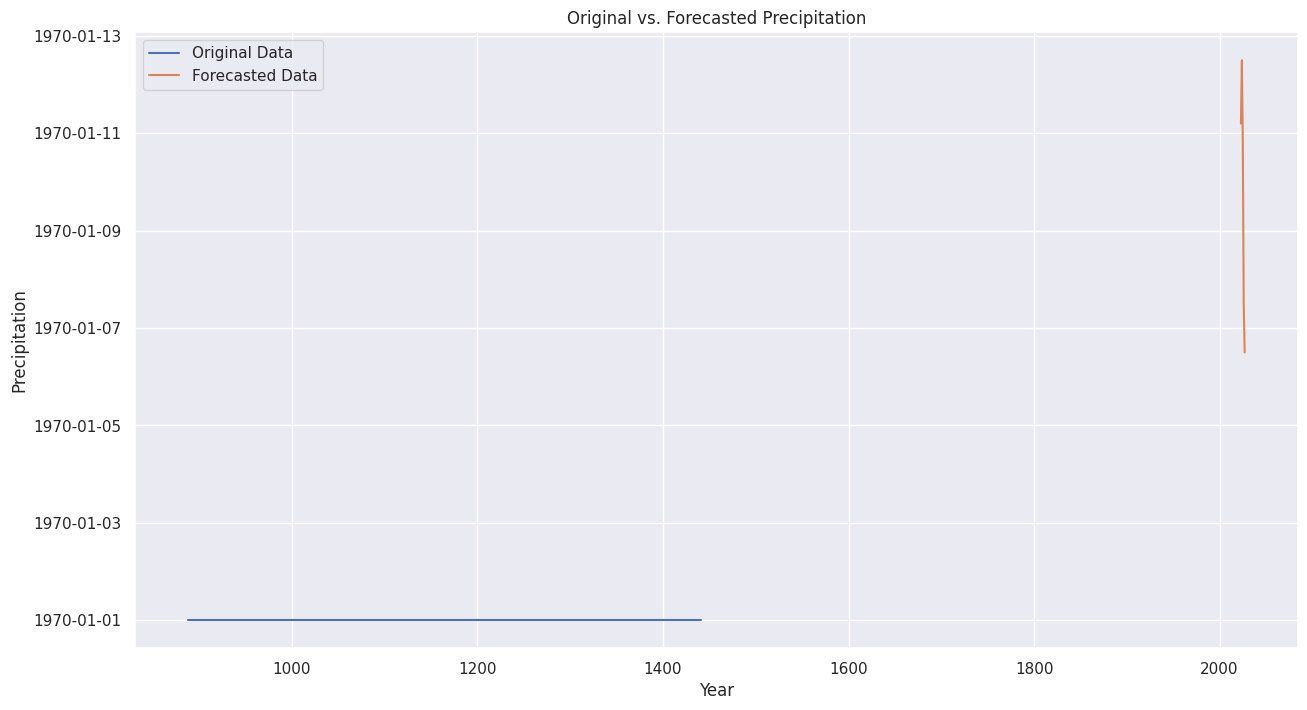

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Plot the original data
sns.lineplot(data=original, x='Precipitation', y='Year', label='Original Data')

# Plot the forecasted data
sns.lineplot(data=df_forecast, x='Year', y='Precipitation', label='Forecasted Data')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Original vs. Forecasted Precipitation')

# Show the legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
train_predictions = best_model.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': trainY.flatten()})
train_results


1/1 [==============================] - 0s 49ms/step


,Train Predictions,Actuals
0,0.049648,0.614701
